# Exploratory Data Analysis for Mergers and Acquisitions

The following project focues on analysis of top M&A

Let's import the necessary for analysis!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Step 1: Read the csv data

- Observer the number of columns
- Look at the dtype of each row 
- Count the number of data
- Check for the null values 

In [2]:
df = pd.read_csv("mergers and acquisitions.csv")

In [3]:
df.head()

,date,acquried_company,acquring_company,business,country,price
0,"February 12, 2001",Dejavue,Google Groups,Usenet,United States,—
1,"September 20, 2001",Outride,Google Personalized Search,Web search engine,United States,—
2,February 2003,Pyra Labs,Blogger,Weblog software,United States,—
3,April 2003,Neotonic Software,"Google Groups, Gmail",Customer relationship management,United States,—
4,April 2003,Applied Semantics,"AdSense, AdWords",Online advertising,United States,"$102,000,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              245 non-null    object
 1   acquried_company  245 non-null    object
 2   acquring_company  239 non-null    object
 3   business          245 non-null    object
 4   country           245 non-null    object
 5   price             245 non-null    object
dtypes: object(6)
memory usage: 11.6+ KB


In [5]:
df.describe()

,date,acquried_company,acquring_company,business,country,price
count,245,245,239,245,245,245
unique,231,245,112,204,24,41
top,"May 7, 2014",BlindType,Google Cloud Platform,Online advertising,United States,—
freq,3,1,22,6,179,189


#### Observation
- There are total 245 rows in each columns
- The number of rows is 6
- Acquring_company has 6 null data
- The dtypes of all the columns is object

###  Step 2: Data Cleaning
- We need to remove special characters from price column.
- Convert date column to standard format
- Remove the null value from acquring_company
- Split day, month, and year column
- Replace '-' with np.nan


In [6]:
df['price'] = df['price'].replace("—", np.nan)

In [7]:
df.price.isna().sum()

189

helping function to remove special characters from price column

In [8]:
def remove_sign(x):
    if x is not np.nan:
        x = x.split("$")[1]
    return x
def remove_comma(x):
    if x is not np.nan:
        x = str(x).replace(",","")
    return x

def to_integer(x):
    if x is not np.nan:
        x = int(x)
    return x 

In [9]:
df.price = df.price.apply(lambda x: to_integer(remove_comma(remove_sign(x))))

Converting date in standard format

In [10]:
df['date'] = pd.to_datetime(df.date)

Splitting the day, month and year columns

In [11]:
df['day'] = df.date.apply(lambda x: str(x).split('-')[-1])
df['month'] = df.date.apply(lambda x: int(str(x).split('-')[1]))
df['year'] = df.date.apply(lambda x: int(str(x).split('-')[0]))

In [12]:
df['day'] = df.day.apply(lambda x: int(x.split(" ")[0]))

Look at the final data for visualization

In [13]:
df.head()

,date,acquried_company,acquring_company,business,country,price,day,month,year
0,2001-02-12,Dejavue,Google Groups,Usenet,United States,NaN,12,2,2001
1,2001-09-20,Outride,Google Personalized Search,Web search engine,United States,NaN,20,9,2001
2,2003-02-01,Pyra Labs,Blogger,Weblog software,United States,NaN,1,2,2003
3,2003-04-01,Neotonic Software,"Google Groups, Gmail",Customer relationship management,United States,NaN,1,4,2003
4,2003-04-01,Applied Semantics,"AdSense, AdWords",Online advertising,United States,102000000.0,1,4,2003


### Step 3: Data Visualization

In [14]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,6)

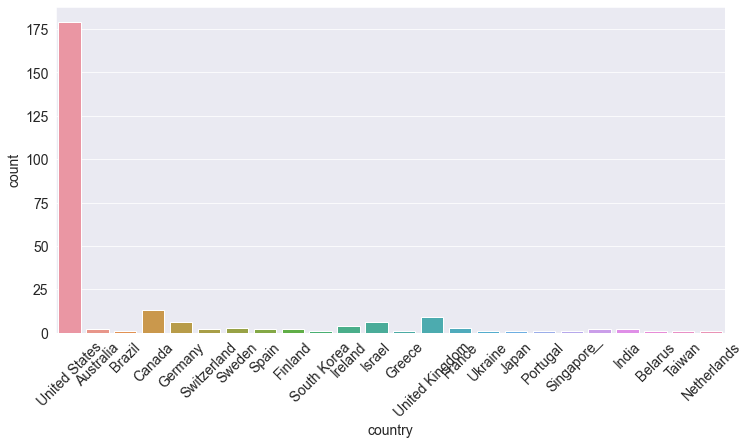

In [16]:
sns.countplot(x="country",data=df);
plt.xticks(rotation=45);

<AxesSubplot:>

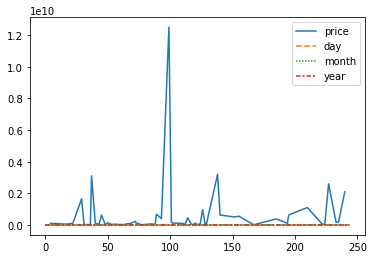

In [19]:
sns.lineplot(data=df)

c:\users\mihir\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


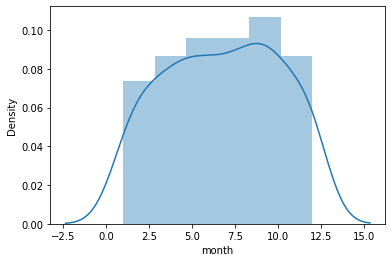

In [21]:
sns.distplot(df.month);

In [20]:
def merge_google_company(x):
    if "Google" in str(x):
        x = "Google"
    return x

In [22]:
df.acquring_company = df.acquring_company.apply(lambda x: merge_google_company(x))

In [23]:
df.head()

,date,acquried_company,acquring_company,business,country,price,day,month,year
0,2001-02-12,Dejavue,Google,Usenet,United States,NaN,12,2,2001
1,2001-09-20,Outride,Google,Web search engine,United States,NaN,20,9,2001
2,2003-02-01,Pyra Labs,Blogger,Weblog software,United States,NaN,1,2,2003
3,2003-04-01,Neotonic Software,Google,Customer relationship management,United States,NaN,1,4,2003
4,2003-04-01,Applied Semantics,"AdSense, AdWords",Online advertising,United States,102000000.0,1,4,2003


In [24]:
df.acquring_company.unique()

array(['Google', 'Blogger', 'AdSense, AdWords', 'Picasa, Blogger',
       'Internet backbone', 'Android', 'Skia', 'AdSense', 'YouTube',
       'Panoramio', 'FeedBurner', 'Gmail', 'WebM, YouTube',
       'DoubleClick, Invite Media', 'Aardvark', 'Picasa', 'WebRTC',
       'DoubleClick', 'Project Zero', 'Android Wear', 'Chronicle', 'X',
       'Nest Labs', 'DoubleClick, AdSense', 'Project Loon',
       'Android for Work', 'YouTube, Android', 'Verily',
       'YouTube for Kids', 'Android Pay', 'Tilt Brush', 'Messages',
       'Street View', 'Spaces', 'Firebase', nan,
       'Accelerated Mobile Pages', 'Stadia', 'Chrome OS', 'Wear OS',
       'Tensor processing unit', 'Pixel Buds'], dtype=object)

In [25]:
%matplotlib inline

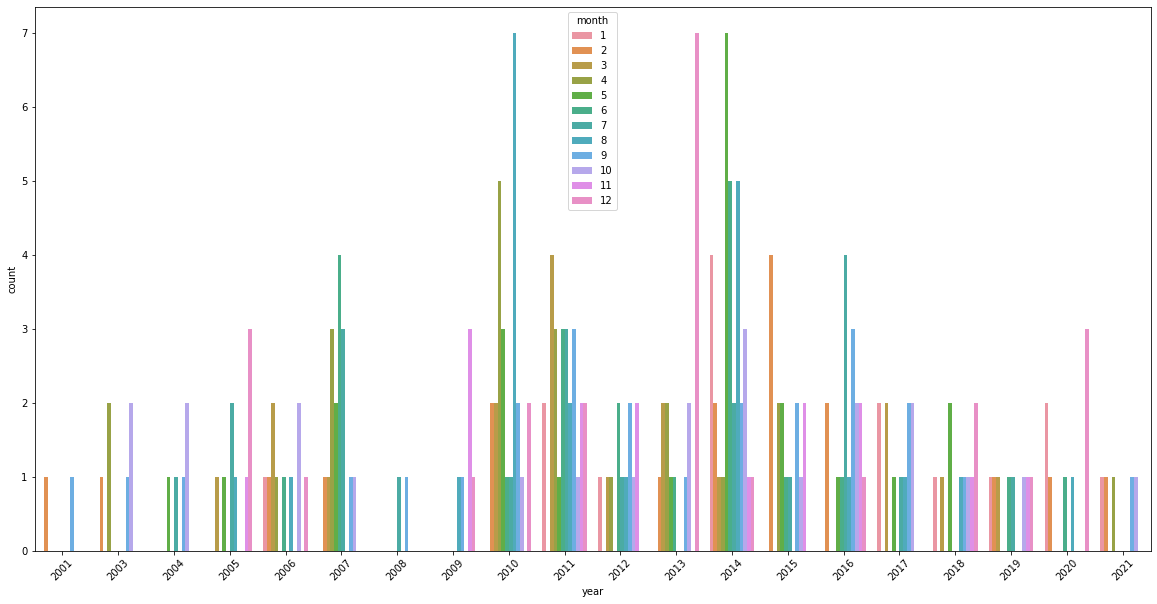

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x="year",hue="month",data=df);
plt.xticks(rotation=45);

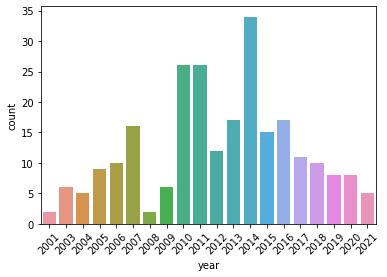

In [35]:
sns.countplot(x="year",data=df)
plt.xticks(rotation=45);

In [37]:
plt.bar(x=df.year,y=df.price)
plt.show() 

TypeError: bar() missing 1 required positional argument: 'height'